<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data_multi_delta_(1_6)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.6_n250.csv',
 'data_multi_delta_1.6_n120.csv',
 'data_multi_delta_1.6_n60.csv',
 'data_multi_delta_1.6_n30.csv',
 'data_multi_delta_1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.6_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,57.728327,41.637520,92.428552,93.923526,-3.183904,292.534022,292.861151,-0.327130
1,0.0,1.0,30.351352,85.683501,82.899089,20.227514,75.914414,305.075869,244.445550,60.630319
2,0.0,2.0,35.778001,55.880104,42.719332,79.146467,-3.227023,220.296880,217.864841,2.432039
3,0.0,3.0,53.147216,95.898995,88.802938,37.553218,0.254358,285.656725,301.783443,-16.126718
4,0.0,4.0,66.392438,61.163319,33.846309,84.155224,-18.097104,237.460185,248.033517,-10.573331
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,43.561347,62.422904,69.802088,83.221733,13.550991,282.559063,277.608237,4.950826
59996,999.0,56.0,29.242024,42.513439,56.437454,86.019106,-4.437232,219.774791,230.130743,-10.355951
59997,999.0,57.0,92.470015,93.626469,74.653078,68.414847,61.571616,400.736026,349.326093,51.409933
59998,999.0,58.0,36.984104,49.400336,39.054943,40.326239,-20.649034,155.116588,178.827429,-23.710840


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,57.728327,41.637520,92.428552,93.923526,-3.183904,292.534022,292.861151,-0.327130
1,0.0,1.0,30.351352,85.683501,82.899089,20.227514,75.914414,305.075869,244.445550,60.630319
2,0.0,2.0,35.778001,55.880104,42.719332,79.146467,-3.227023,220.296880,217.864841,2.432039
3,0.0,3.0,53.147216,95.898995,88.802938,37.553218,0.254358,285.656725,301.783443,-16.126718
4,0.0,4.0,66.392438,61.163319,33.846309,84.155224,-18.097104,237.460185,248.033517,-10.573331
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,43.561347,62.422904,69.802088,83.221733,13.550991,282.559063,277.608237,4.950826
59996,999.0,56.0,29.242024,42.513439,56.437454,86.019106,-4.437232,219.774791,230.130743,-10.355951
59997,999.0,57.0,92.470015,93.626469,74.653078,68.414847,61.571616,400.736026,349.326093,51.409933
59998,999.0,58.0,36.984104,49.400336,39.054943,40.326239,-20.649034,155.116588,178.827429,-23.710840


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    57.728327  41.637520  92.428552  93.923526  -3.183904   
      1.0    30.351352  85.683501  82.899089  20.227514  75.914414   
      2.0    35.778001  55.880104  42.719332  79.146467  -3.227023   
      3.0    53.147216  95.898995  88.802938  37.553218   0.254358   
      4.0    66.392438  61.163319  33.846309  84.155224 -18.097104   
...                ...        ...        ...        ...        ...   
999.0 55.0   43.561347  62.422904  69.802088  83.221733  13.550991   
      56.0   29.242024  42.513439  56.437454  86.019106  -4.437232   
      57.0   92.470015  93.626469  74.653078  68.414847  61.571616   
      58.0   36.984104  49.400336  39.054943  40.326239 -20.649034   
      59.0   34.815171  74.001747  48.031346  31.757860  66.189158   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    292.534022  292.861151  -0.327130  
      1.0    305.075869  244.445550  60.630319  
      2.0    220.296880  217.864841   2.432039  
      3.0    285.656725  301.783443 -16.126718  
      4.0    237.460185  248.033517 -10.573331  
...                 ...         ...        ...  
999.0 55.0   282.559063  277.608237   4.950826  
      56.0   219.774791  230.130743 -10.355951  
      57.0   400.736026  349.326093  51.409933  
      58.0   155.116588  178.827429 -23.710840  
      59.0   264.795283  206.803934  57.991348  

[60000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    57.728327  41.637520  92.428552  93.923526  -3.183904   
      1.0    30.351352  85.683501  82.899089  20.227514  75.914414   
      2.0    35.778001  55.880104  42.719332  79.146467  -3.227023   
      3.0    53.147216  95.898995  88.802938  37.553218   0.254358   
      4.0    66.392438  61.163319  33.846309  84.155224 -18.097104   
...                ...        ...        ...        ...        ...   
999.0 55.0   43.561347  62.422904  69.802088  83.221733  13.550991   
      56.0   29.242024  42.513439  56.437454  86.019106  -4.437232   
      57.0   92.470015  93.626469  74.653078  68.414847  61.571616   
      58.0   36.984104  49.400336  39.054943  40.326239 -20.649034   
      59.0   34.815171  74.001747  48.031346  31.757860  66.189158   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    292.534022  292.861151  -0.327130  
      1.0    305.075869  244.445550  60.630319  
      2.0    220.296880  217.864841   2.432039  
      3.0    285.656725  301.783443 -16.126718  
      4.0    237.460185  248.033517 -10.573331  
...                 ...         ...        ...  
999.0 55.0   282.559063  277.608237   4.950826  
      56.0   219.774791  230.130743 -10.355951  
      57.0   400.736026  349.326093  51.409933  
      58.0   155.116588  178.827429 -23.710840  
      59.0   264.795283  206.803934  57.991348  

[60000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,57.728327,41.637520,92.428552,93.923526,-3.183904,292.534022,292.861151,-0.327130
1,0.0,1.0,30.351352,85.683501,82.899089,20.227514,75.914414,305.075869,244.445550,60.630319
2,0.0,2.0,35.778001,55.880104,42.719332,79.146467,-3.227023,220.296880,217.864841,2.432039
3,0.0,3.0,53.147216,95.898995,88.802938,37.553218,0.254358,285.656725,301.783443,-16.126718
4,0.0,4.0,66.392438,61.163319,33.846309,84.155224,-18.097104,237.460185,248.033517,-10.573331
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,43.561347,62.422904,69.802088,83.221733,13.550991,282.559063,277.608237,4.950826
59996,999.0,56.0,29.242024,42.513439,56.437454,86.019106,-4.437232,219.774791,230.130743,-10.355951
59997,999.0,57.0,92.470015,93.626469,74.653078,68.414847,61.571616,400.736026,349.326093,51.409933
59998,999.0,58.0,36.984104,49.400336,39.054943,40.326239,-20.649034,155.116588,178.827429,-23.710840


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    57.728327  41.637520  92.428552  93.923526  -3.183904   
      1.0    30.351352  85.683501  82.899089  20.227514  75.914414   
      2.0    35.778001  55.880104  42.719332  79.146467  -3.227023   
      3.0    53.147216  95.898995  88.802938  37.553218   0.254358   
      4.0    66.392438  61.163319  33.846309  84.155224 -18.097104   
...                ...        ...        ...        ...        ...   
999.0 55.0   43.561347  62.422904  69.802088  83.221733  13.550991   
      56.0   29.242024  42.513439  56.437454  86.019106  -4.437232   
      57.0   92.470015  93.626469  74.653078  68.414847  61.571616   
      58.0   36.984104  49.400336  39.054943  40.326239 -20.649034   
      59.0   34.815171  74.001747  48.031346  31.757860  66.189158   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    292.534022  292.861151  -0.327130  
      1.0    305.075869  244.445550  60.630319  
      2.0    220.296880  217.864841   2.432039  
      3.0    285.656725  301.783443 -16.126718  
      4.0    237.460185  248.033517 -10.573331  
...                 ...         ...        ...  
999.0 55.0   282.559063  277.608237   4.950826  
      56.0   219.774791  230.130743 -10.355951  
      57.0   400.736026  349.326093  51.409933  
      58.0   155.116588  178.827429 -23.710840  
      59.0   264.795283  206.803934  57.991348  

[60000 rows x 8 columns]

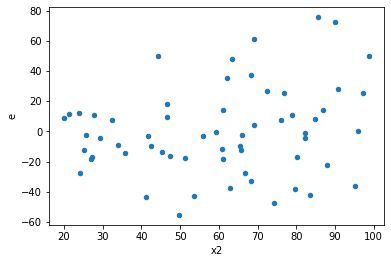

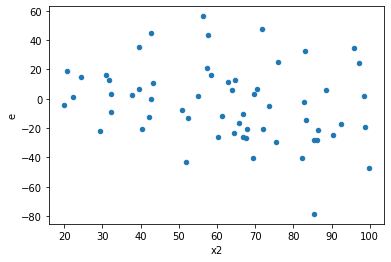

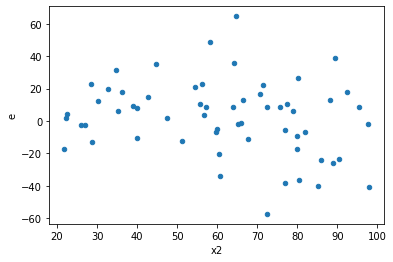

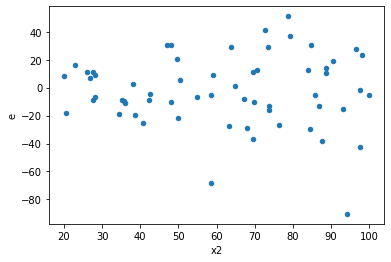

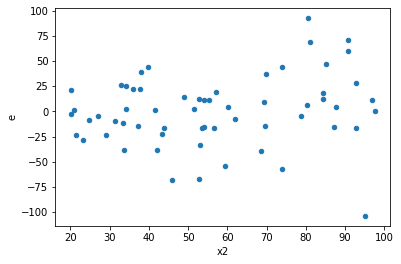

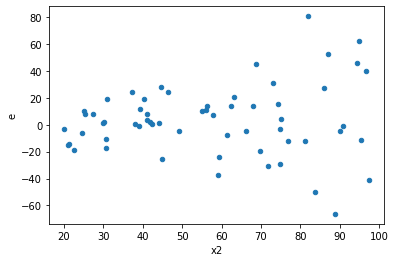

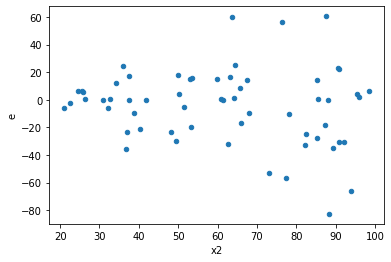

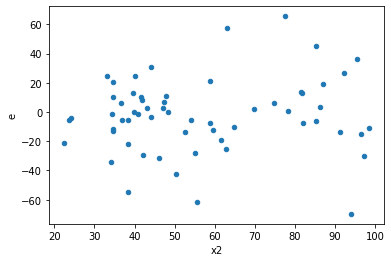

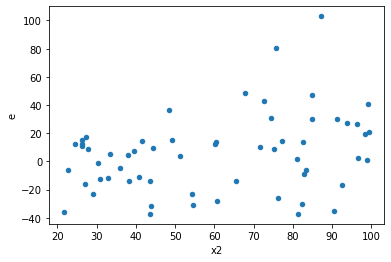

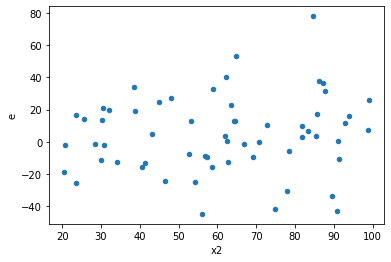

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,20.0,20.0,10256.671166456474,22128.163074971464,512.8335583228237,1106.408153748573,2.157441017251254,0.09334215414368274,0.9533289229281586,0.04667107707184137,Reject005=1 : Homoscedasticity
1.0,20.0,20.0,9560.457345443563,16154.141534792325,478.02286727217813,807.7070767396162,1.6896829253143688,0.24936644764504767,0.8753167761774762,0.12468322382252384,Reject005=1 : Homoscedasticity
2.0,20.0,20.0,3677.7743235668845,11616.242322863814,183.88871617834423,580.8121161431907,3.1584978579103833,0.013309619202259926,0.99334519039887,0.006654809601129963,Reject005=0 : Heteroscedasticity
3.0,20.0,20.0,5352.191253666774,17360.251469747745,267.6095626833387,868.0125734873873,3.243578311566179,0.01141533781212778,0.9942923310939361,0.00570766890606389,Reject005=0 : Heteroscedasticity
4.0,20.0,20.0,14305.787894250294,37442.268474968056,715.2893947125146,1872.1134237484027,2.617281113892137,0.03695929166812051,0.9815203541659397,0.018479645834060254,Reject005=0 : Heteroscedasticity
5.0,20.0,20.0,2550.192609849427,30779.669961931235,127.50963049247135,1538.9834980965618,12.06954715618464,6.651857127337735e-07,0.9999996674071436,3.3259285636688674e-07,Reject005=0 : Heteroscedasticity
6.0,20.0,20.0,4725.62827201993,26460.72380471597,236.28141360099647,1323.0361902357986,5.599408646123907,0.00031313368868235436,0.9998434331556588,0.00015656684434117718,Reject005=0 : Heteroscedasticity
7.0,20.0,20.0,7312.955461226765,17495.815540493742,365.6477730613382,874.7907770246871,2.392441145478928,0.05777368745485756,0.9711131562725712,0.02888684372742878,Reject005=1 : Homoscedasticity
8.0,20.0,20.0,5125.612880807183,25787.728218948643,256.2806440403591,1289.386410947432,5.031150189962763,0.0006735007571725404,0.9996632496214137,0.0003367503785862702,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,20.0,20.0,10256.671166456474,22128.163074971464,512.8335583228237,1106.408153748573,2.157441017251254,0.09334215414368274,Reject005=1 : Homoscedasticity
1.0,20.0,20.0,9560.457345443563,16154.141534792325,478.02286727217813,807.7070767396162,1.6896829253143688,0.24936644764504767,Reject005=1 : Homoscedasticity
2.0,20.0,20.0,3677.7743235668845,11616.242322863814,183.88871617834423,580.8121161431907,3.1584978579103833,0.013309619202259926,Reject005=0 : Heteroscedasticity
3.0,20.0,20.0,5352.191253666774,17360.251469747745,267.6095626833387,868.0125734873873,3.243578311566179,0.01141533781212778,Reject005=0 : Heteroscedasticity
4.0,20.0,20.0,14305.787894250294,37442.268474968056,715.2893947125146,1872.1134237484027,2.617281113892137,0.03695929166812051,Reject005=0 : Heteroscedasticity
5.0,20.0,20.0,2550.192609849427,30779.669961931235,127.50963049247135,1538.9834980965618,12.06954715618464,6.651857127337735e-07,Reject005=0 : Heteroscedasticity
6.0,20.0,20.0,4725.62827201993,26460.72380471597,236.28141360099647,1323.0361902357986,5.599408646123907,0.00031313368868235436,Reject005=0 : Heteroscedasticity
7.0,20.0,20.0,7312.955461226765,17495.815540493742,365.6477730613382,874.7907770246871,2.392441145478928,0.05777368745485756,Reject005=1 : Homoscedasticity
8.0,20.0,20.0,5125.612880807183,25787.728218948643,256.2806440403591,1289.386410947432,5.031150189962763,0.0006735007571725404,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    777
Reject005=1 : Homoscedasticity      223
Name: Result_test, dtype: int64